📦 Loading data...
✅ Data Loaded and Cleaned.
✅ Vehicle Usage Summary Built.
  Vehicle_ID_y  Clusters_Served  Total_Orders_Assigned Vehicle_ID  \
0    GJ01X1085                1                   2716  GJ01X1085   
1    GJ01X1085                1                   2716  GJ01X1085   
2    GJ01X1573                2                   7048  GJ01X1573   
3    GJ01X1573                2                   7048  GJ01X1573   
4    GJ01X2097                1                   4648  GJ01X2097   

  Vehicle_Type Capacity_Type  Volume_Capacity_(L)  Weight_Capacity_(kg)  
0      General         Truck                35000                  9000  
1  Specialised        Sp.Van                15000                  4000  
2  Specialised        Sp.Van                15000                  4000  
3      General         Truck                35000                  9000  
4      General         Truck                35000                  9000  


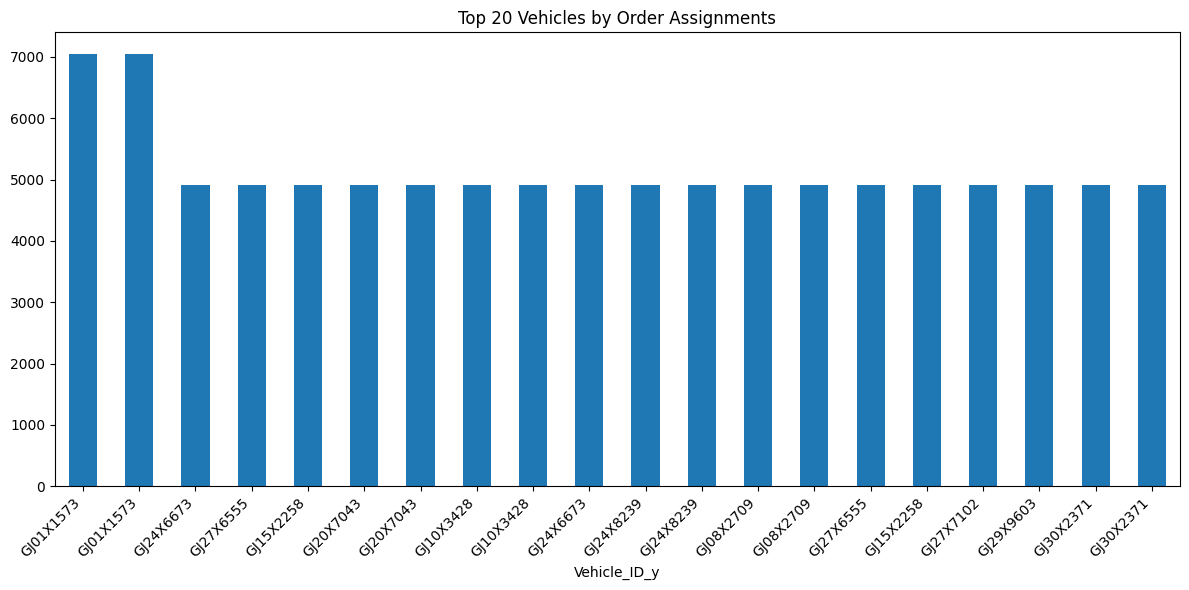

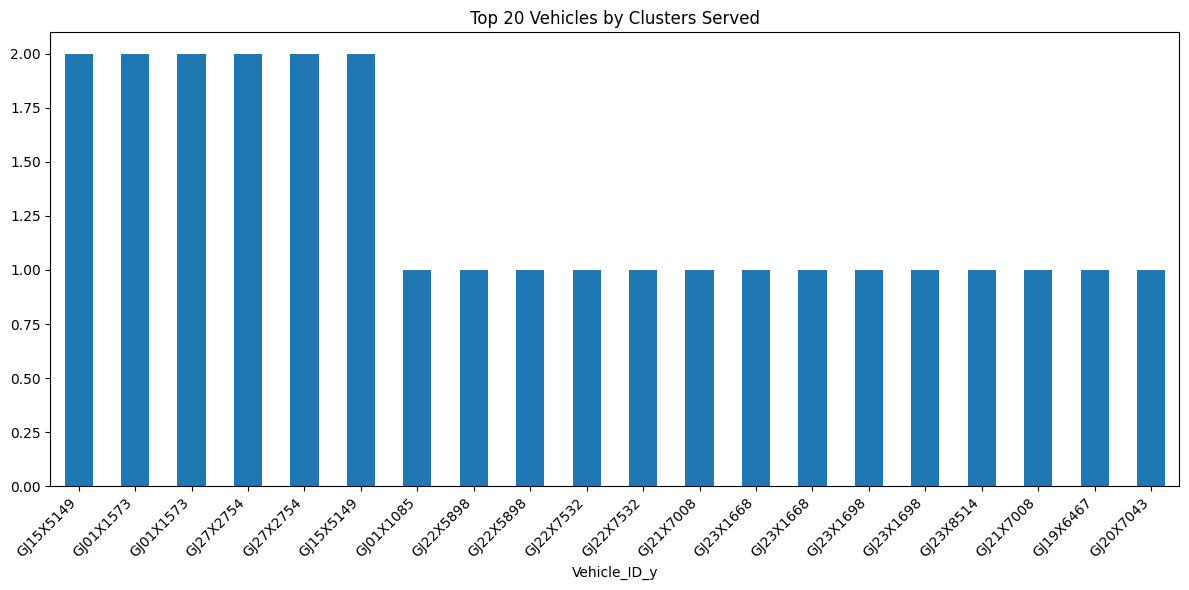

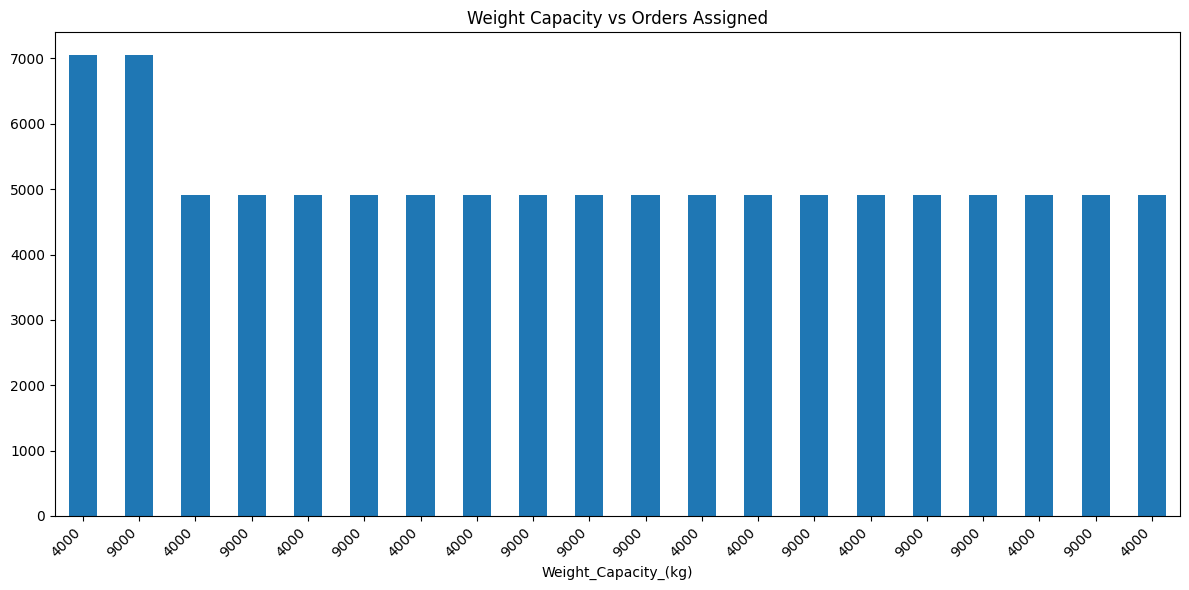

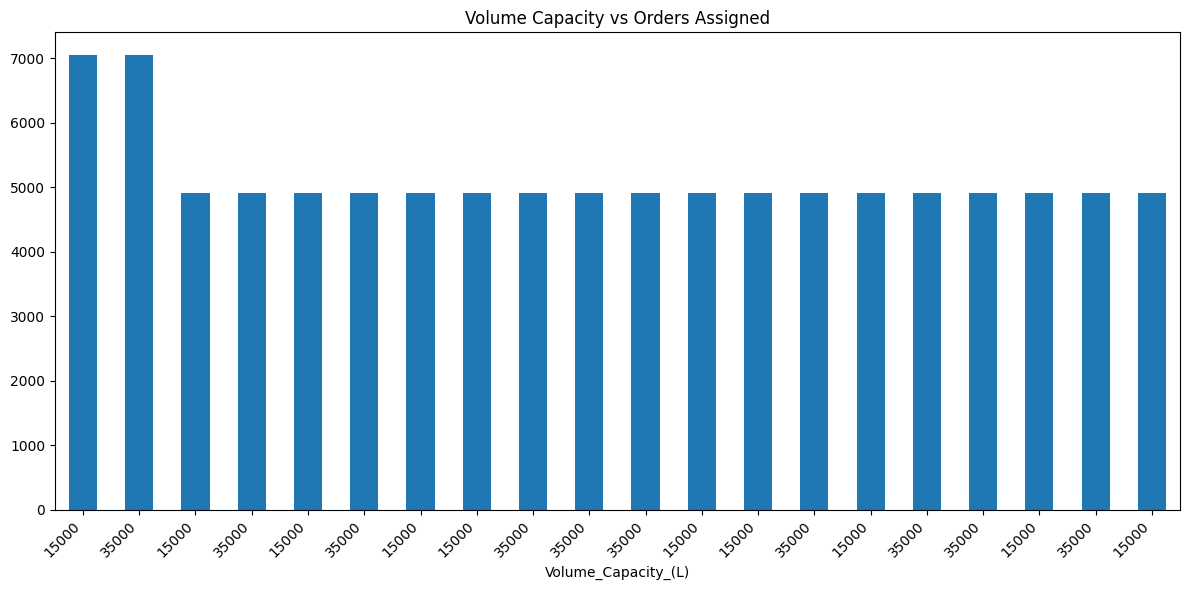

✅ All plots generated. You can now use `plot_column_vs_column()` manually.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- File paths ---
CLUSTERED_PATH = r"C:\Users\Administrator\Desktop\Python\ML\ProjectPlan\clustered_output_with_vehicleinfo.csv"
VEHICLE_PATH = r"C:\Users\Administrator\Desktop\Python\ML\DataSets\projectplancluster\vehicle_type_map_with_capacity.csv"
OUTPUT_PATH = r"C:\Users\Administrator\Desktop\Python\ML\ProjectPlan\clustered_with_vehicle_assignments_final.csv"

# --- Load data ---
print("📦 Loading data...")
df_clusters = pd.read_csv(CLUSTERED_PATH)
df_vehicles = pd.read_csv(VEHICLE_PATH)
df_final = pd.read_csv(OUTPUT_PATH)

# --- Clean columns ---
df_clusters.columns = df_clusters.columns.str.strip().str.replace(" ", "_")
df_vehicles.columns = df_vehicles.columns.str.strip().str.replace(" ", "_")
df_final.columns = df_final.columns.str.strip().str.replace(" ", "_")

print("✅ Data Loaded and Cleaned.")

# --- Build Summary: Vehicle Usage ---
vehicle_usage_summary = df_final.groupby("Vehicle_ID_y").agg({
    "Cluster_Label": "nunique",
    "Assignment_ID": "count"
}).rename(columns={
    "Cluster_Label": "Clusters_Served",
    "Assignment_ID": "Total_Orders_Assigned"
}).reset_index()

# Merge vehicle metadata
vehicle_usage_summary = vehicle_usage_summary.merge(
    df_vehicles,
    left_on="Vehicle_ID_y", right_on="Vehicle_ID", how="left"
)

print("✅ Vehicle Usage Summary Built.")
print(vehicle_usage_summary.head())


# --- Plotting Function ---
def plot_column_vs_column(x_col, y_col, top_n=20, sort_by=None, title=None):
    df_plot = vehicle_usage_summary.copy()

    # Sorting
    if sort_by is None:
        sort_by = y_col
    df_plot = df_plot.sort_values(sort_by, ascending=False).head(top_n)

    # Plot
    df_plot.plot(
        x=x_col, y=y_col,
        kind="bar",
        figsize=(12, 6),
        title=title if title else f"{y_col} vs {x_col}",
        legend=False
    )
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# --- Example Plots ---

# Plot 1: Top 20 Vehicles by Orders
plot_column_vs_column("Vehicle_ID_y", "Total_Orders_Assigned", top_n=20, title="Top 20 Vehicles by Order Assignments")

# Plot 2: Vehicles by Clusters Served
plot_column_vs_column("Vehicle_ID_y", "Clusters_Served", top_n=20, title="Top 20 Vehicles by Clusters Served")

# Plot 3: Weight Capacity vs Orders
plot_column_vs_column("Weight_Capacity_(kg)", "Total_Orders_Assigned", top_n=20, title="Weight Capacity vs Orders Assigned")

# Plot 4: Volume Capacity vs Orders
plot_column_vs_column("Volume_Capacity_(L)", "Total_Orders_Assigned", top_n=20, title="Volume Capacity vs Orders Assigned")

# You can now call:
# plot_column_vs_column("Capacity_Type", "Total_Orders_Assigned", top_n=10)
# plot_column_vs_column("Vehicle_Type", "Clusters_Served", top_n=10)

print("✅ All plots generated. You can now use `plot_column_vs_column()` manually.")



📊 Main Cluster Summary:
  Main_Cluster_Label  Total_Orders  Total_Weight  Total_Volume  \
0           Mid-Term         59336     2269420.0     1150784.4   
1    Next-Day Urgent         87180     4343595.6     2255914.0   
2    Same-Day Urgent         50668     2436063.6     1267756.6   

   Unique_Vehicles_Assigned  
0                        61  
1                        61  
2                        61  


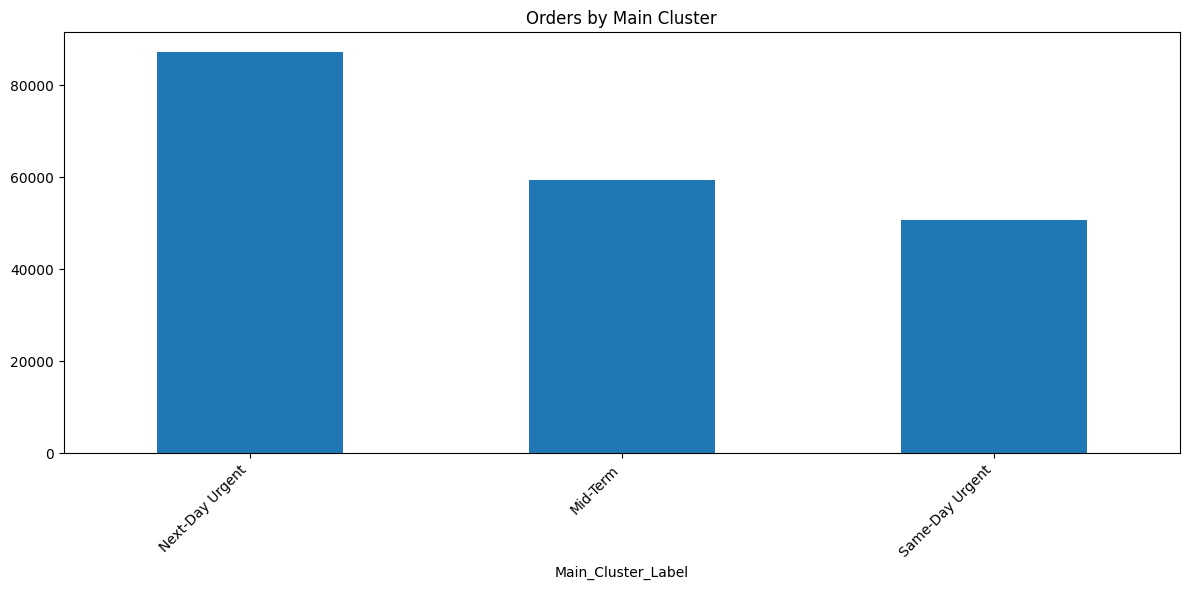

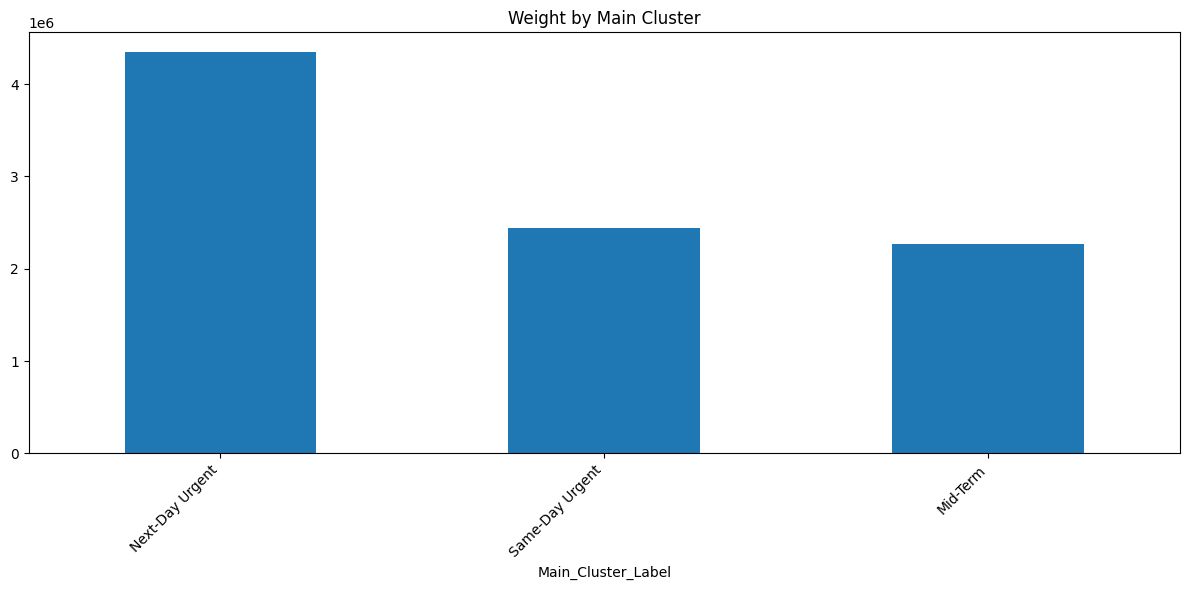

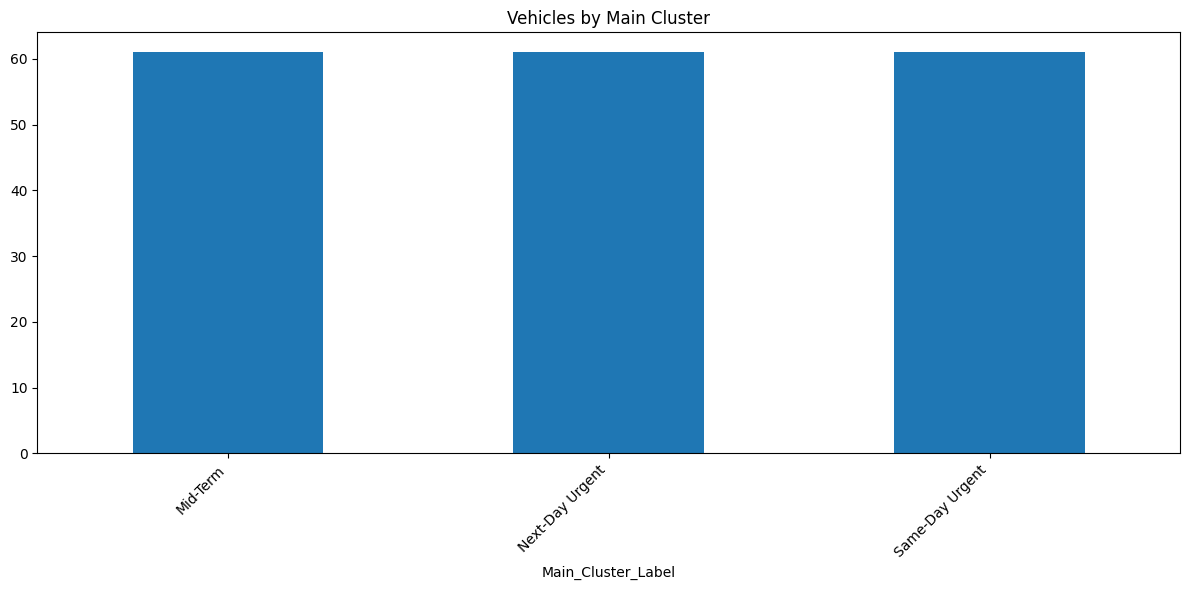


📦 Handling Group Summary:
  Handling_Group  Total_Orders  Total_Weight  Total_Volume  \
0   Fragile Only         25472     1174068.0      652260.0   
1   Fragile+Temp         51356     4124151.2     2062075.6   
2         Normal         94744     3157868.0     1604324.2   
3      Temp Only         25612      592992.0      355795.2   

   Unique_Vehicles_Assigned  
0                        61  
1                        61  
2                        61  
3                        61  


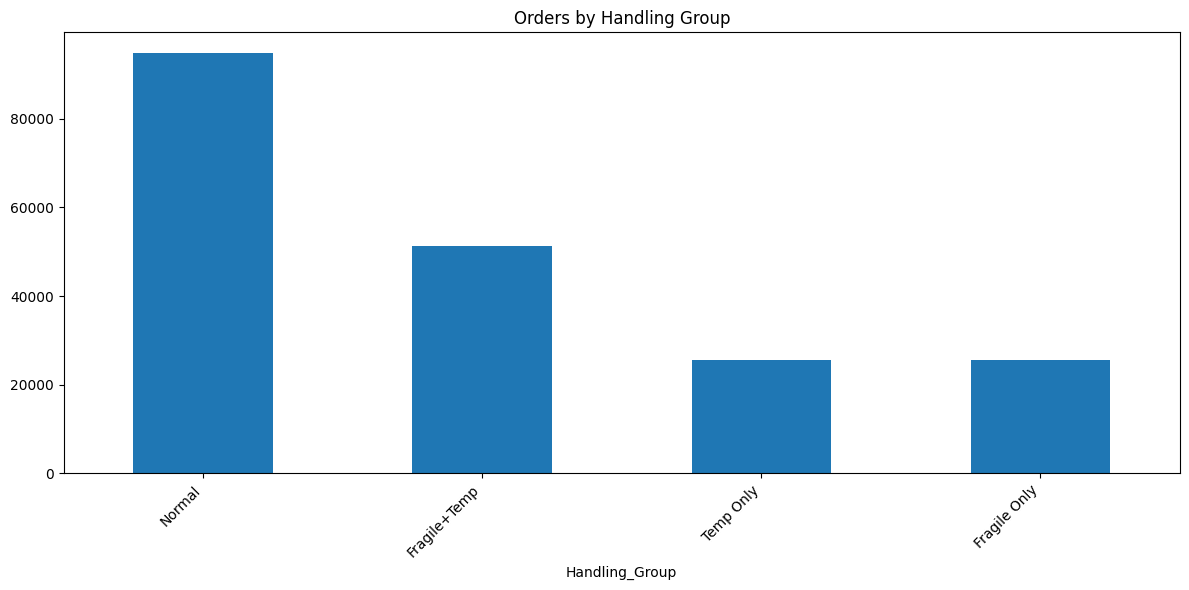

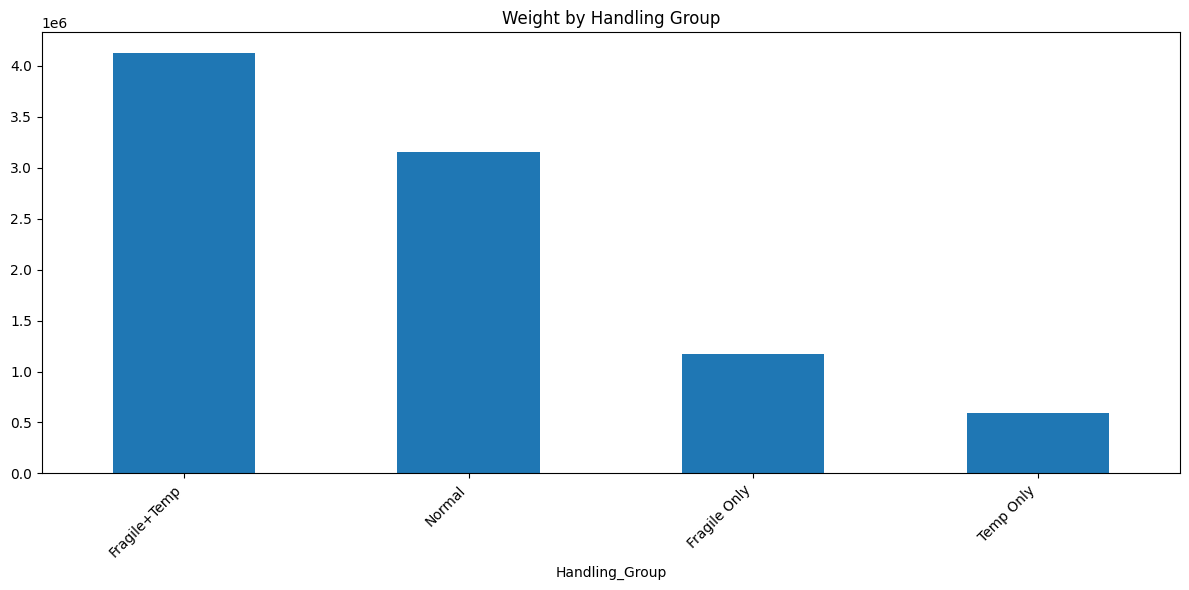

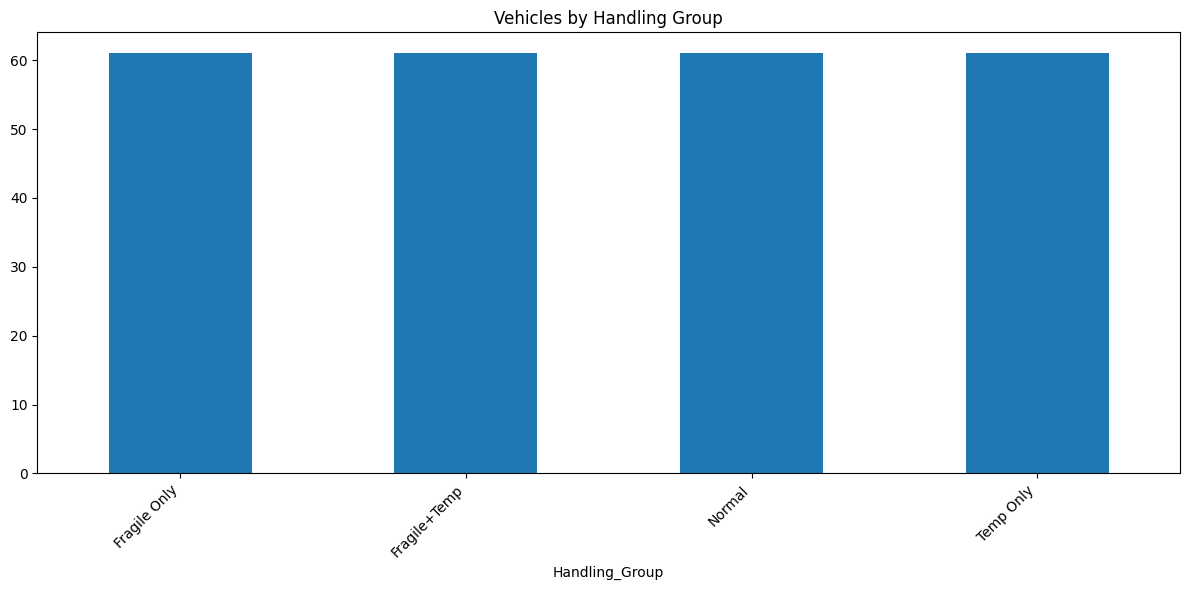


🧠 ML Cluster (0–5) Summary:
   Cluster_Label  Total_Orders  Total_Weight  Total_Volume  \
0              0         54032     1441193.6      748072.6   
1              1         26520     1068912.0      572648.0   
2              2         29904     2474623.2     1237594.4   
3              3         32592     2148878.4     1134163.2   
4              4         21600     1123548.0      560140.0   
5              5         32536      791924.0      421836.8   

   Unique_Vehicles_Assigned  
0                        11  
1                        10  
2                        14  
3                        12  
4                        10  
5                         7  


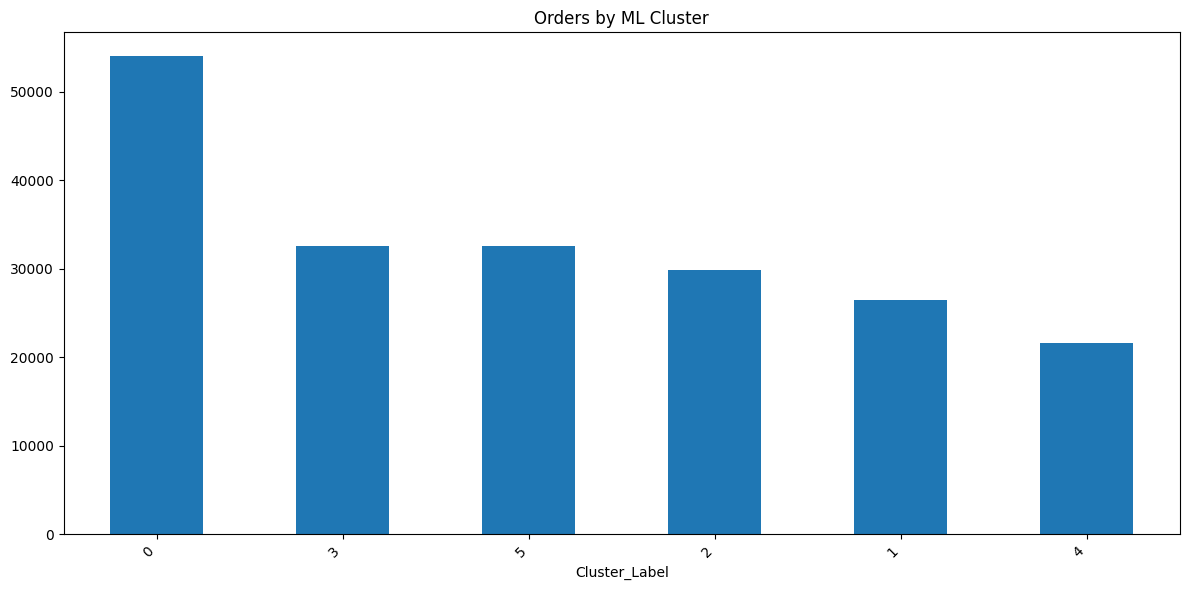

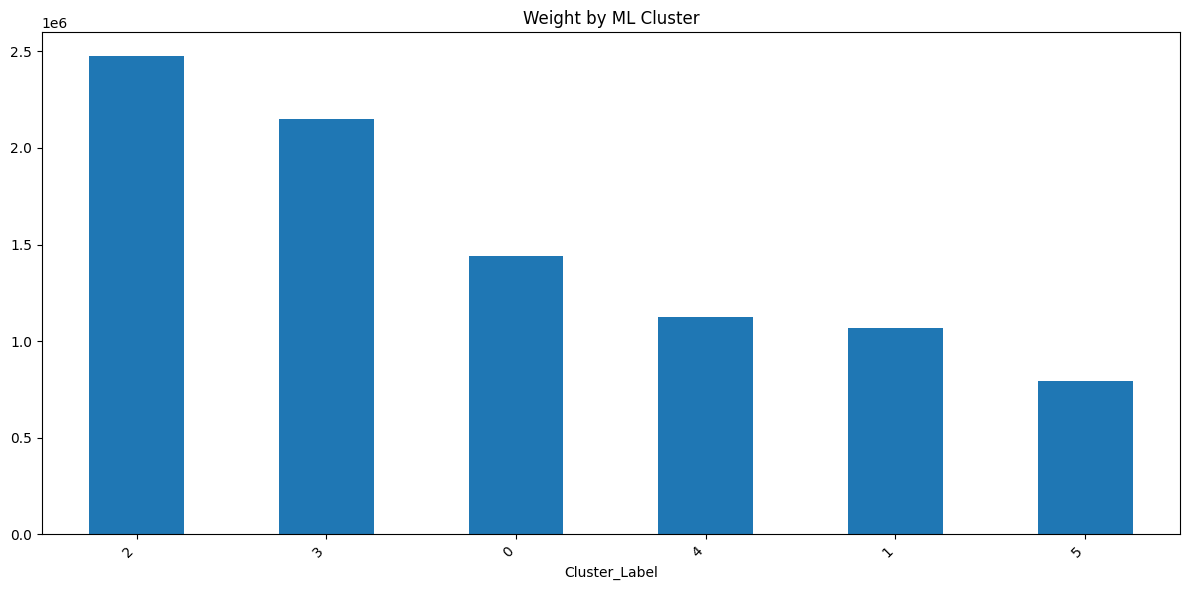

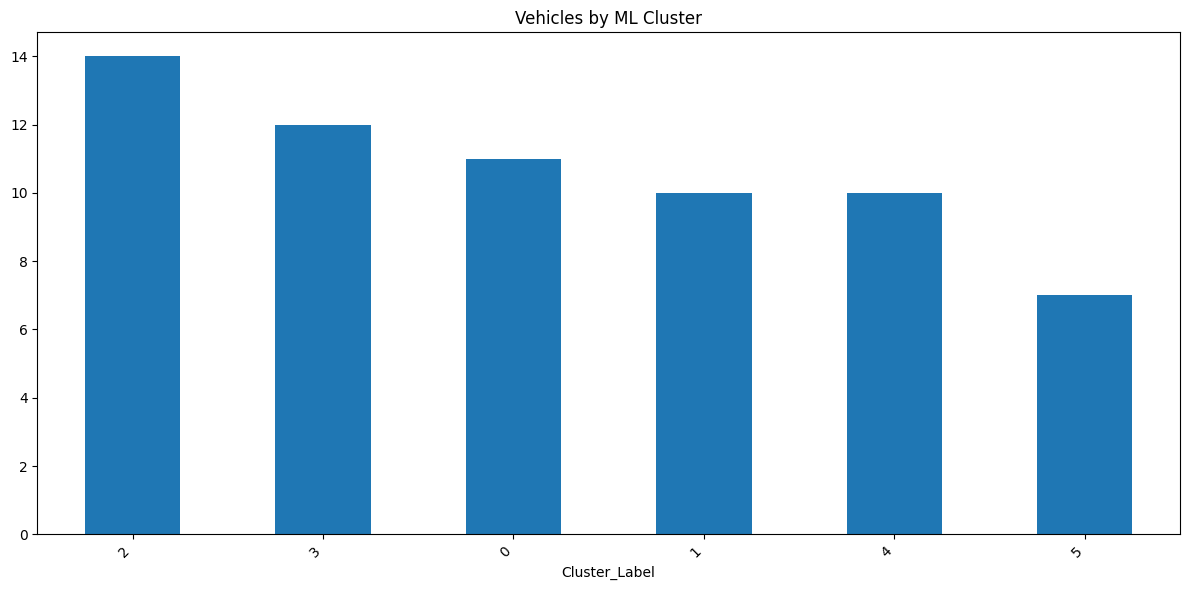

In [2]:
# --- GROUPING UTILITY ---
def build_group_summary(df, group_col):
    grouped = df.groupby(group_col).agg({
        "Assignment_ID": "count",
        "Total_Weight": "sum",
        "Total_Volume": "sum",
        "Vehicle_ID_y": pd.Series.nunique
    }).rename(columns={
        "Assignment_ID": "Total_Orders",
        "Vehicle_ID_y": "Unique_Vehicles_Assigned"
    }).reset_index()
    return grouped


# --- PLOTTING UTILITY ---
def plot_group_summary(df_group, group_col, metric_col, top_n=10, title=None):
    df_plot = df_group.sort_values(metric_col, ascending=False).head(top_n)

    df_plot.plot(
        x=group_col,
        y=metric_col,
        kind="bar",
        figsize=(12, 6),
        title=title if title else f"{metric_col} by {group_col}",
        legend=False
    )
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# --- ANALYSIS: MAIN CLUSTER LABEL (e.g., Same-Day, Next-Day etc.) ---
main_cluster_group = build_group_summary(df_final, "Main_Cluster_Label")
print("\n📊 Main Cluster Summary:")
print(main_cluster_group)

plot_group_summary(main_cluster_group, "Main_Cluster_Label", "Total_Orders", title="Orders by Main Cluster")
plot_group_summary(main_cluster_group, "Main_Cluster_Label", "Total_Weight", title="Weight by Main Cluster")
plot_group_summary(main_cluster_group, "Main_Cluster_Label", "Unique_Vehicles_Assigned", title="Vehicles by Main Cluster")


# --- ANALYSIS: SUB CLUSTER (Handling Group: Fragile/Temp etc.) ---
sub_cluster_group = build_group_summary(df_final, "Handling_Group")
print("\n📦 Handling Group Summary:")
print(sub_cluster_group)

plot_group_summary(sub_cluster_group, "Handling_Group", "Total_Orders", title="Orders by Handling Group")
plot_group_summary(sub_cluster_group, "Handling_Group", "Total_Weight", title="Weight by Handling Group")
plot_group_summary(sub_cluster_group, "Handling_Group", "Unique_Vehicles_Assigned", title="Vehicles by Handling Group")


# --- ANALYSIS: ML CLUSTER LABEL (KMeans Cluster 0–5) ---
ml_cluster_group = build_group_summary(df_final, "Cluster_Label")
print("\n🧠 ML Cluster (0–5) Summary:")
print(ml_cluster_group)

plot_group_summary(ml_cluster_group, "Cluster_Label", "Total_Orders", title="Orders by ML Cluster")
plot_group_summary(ml_cluster_group, "Cluster_Label", "Total_Weight", title="Weight by ML Cluster")
plot_group_summary(ml_cluster_group, "Cluster_Label", "Unique_Vehicles_Assigned", title="Vehicles by ML Cluster")
